In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean

In [2]:
def read_file(filename , samples = 1024 ):
    data = np.fromfile(filename,  dtype=np.int16)
    n = len(data)/samples
    data = np.array(np.array_split(np.array(data),n))
    return data

dataLED=read_file(filename= '/data/abalone/ABALONE_RampingUp/2021_09_13_T1206_ABALONE_20kV_SiPM2_32V_LED300V.dat' , samples = 1024)

In [3]:
n=len(dataLED)
print("Il numero degli eventi è ", n)

nn=len(dataLED[0]) #nn=1024 è il numero di campioni ognuno preso in un intervallo di 10ns
print('Il numero di campioni è', nn, 'ognuno preso in un intervallo di 10ns')

inf=int(nn/2)-10  #limite inferiore dell'intervallo in cui voglio cercare il max
sup=int(nn/2)+60  #limite superiore dell'intervallo in cui voglio cercare il max
print("L'intervallo in cui cerco il max è [", inf, ",", sup,"]" )

Il numero degli eventi è  595575
Il numero di campioni è 1024 ognuno preso in un intervallo di 10ns
L'intervallo in cui cerco il max è [ 502 , 572 ]


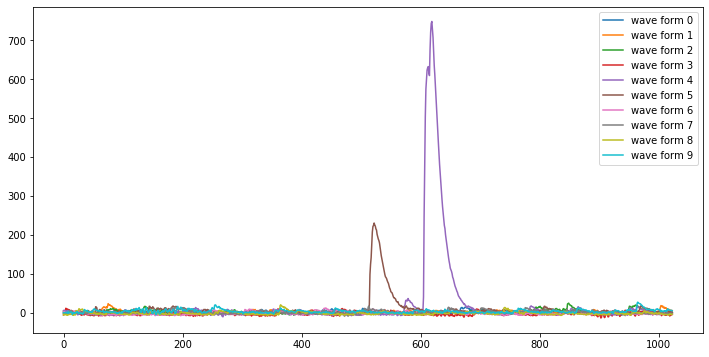

In [4]:
plt.figure(figsize=(12,6))

for i in range(10):
    bl=np.mean(dataLED[i][:40]) 
    wf=(dataLED[i]-bl)*(-1)
    
    plt.plot(wf,label=f"wave form {i}")
    plt.legend()

In [5]:
BASE, MAX_POS , MAX, INF, SUP, A, B, AREA = [], [], [], [], [], [], [], []

for i in range(n):
    bl=np.mean(dataLED[i][:40]) 
    std=np.std(dataLED[i][:40])
    wf=(dataLED[i]-bl)*(-1)
    
    max_pos=inf+np.where(wf[inf:sup]==np.max(wf[inf:sup]))[0][0]  #cerco il max nell'intervallo [inf,sup] definito all'inizio
    
    try:
        if wf[max_pos]>3*std :
            idx1= np.where(wf[0:max_pos]<3*std)[0][-1]
            
        else:
            idx1= np.where(wf[0:max_pos]<0)[0][-1]
                        
    except:
        print("Per wf_",i,"non è possibile determinare l'estremo a dell'integrale")
           
    if wf[max_pos]>3*std :
        try:
            idx2= max_pos+np.where(wf[max_pos:nn]<3*std)[0][0]
            
        except:
            idx2=nn-2
    else:
        try:
            idx2= max_pos+np.where(wf[max_pos:nn]<0)[0][0]
            
        except:
            print(f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
        
    a=idx1-2
    b=idx2+2
    
    area=np.sum(wf[a:b])
    
    BASE.append(bl)
    MAX_POS.append(max_pos)    
    MAX.append(wf[max_pos])
    INF.append(inf)
    SUP.append(sup)
    A.append(a)
    B.append(b)
    AREA.append(area)
    
data = pd.DataFrame(columns=['pos_max','wf_max', 'inf', 'sup', 'a','b','area'])
data['area'] = AREA
data['wf_max'] =  MAX
data['pos_max'] = MAX_POS
data['inf'] = INF
data['sup'] = SUP
data['a'] = A
data['b'] = B

data.to_hdf(f'data_ABALONE_.h5', key='df', mode='w')

Per wf_574137 non è possibile determinare l'estremo b dell'integrale


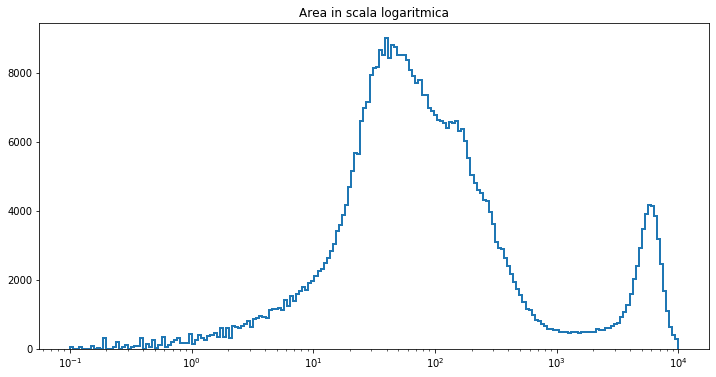

In [6]:
area_space = np.logspace(-1,4,200)  #partendo da 10^(-1) fino a 10^4 con 200bins

plt.figure(figsize=(12,6))

plt.hist(data['area'],bins=area_space,histtype='step',lw=2,density=False)
plt.title("Area in scala logaritmica")

plt.xscale('log')


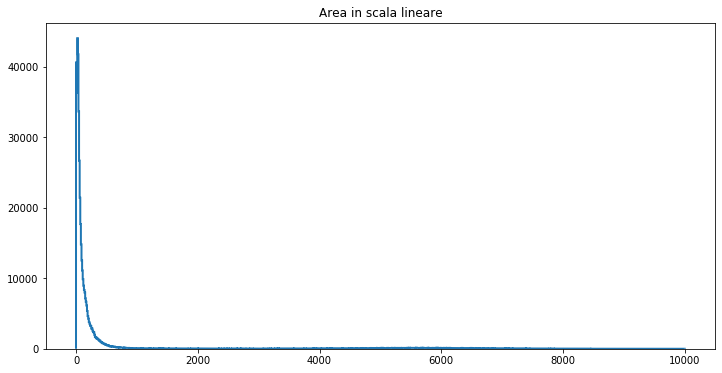

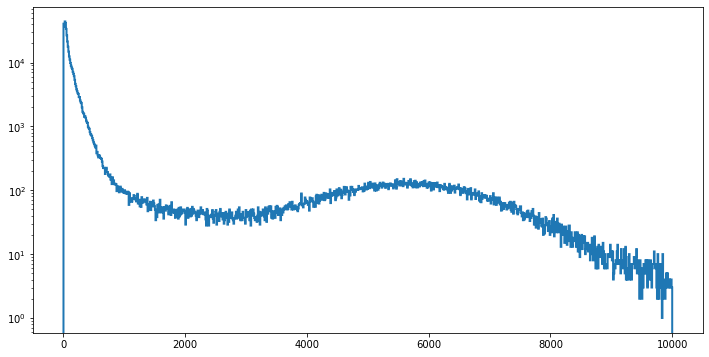

In [7]:
area_space = np.linspace(0,10000,1000)

plt.figure(figsize=(12,6))
plt.hist(data['area'],bins=area_space,histtype='step',lw=2,density=False)
plt.title("Area in scala lineare")

plt.figure(figsize=(12,6))
plt.hist(data['area'],bins=area_space,histtype='step',lw=2,density=False)
plt.yscale("log")